**CHAPTER 1 - INTRODUCTION**

**Machine learning setting**

A space of objects $\mathcal{X}$.
A set of labels, usually $\mathbb{R}$ or a subset of $\mathbb{R}$ like $\{-1,+1\}$, e.g in classification problems.

A set of functions $\mathcal{F}$ called predictors.
For each $f\in\mathcal{F}$, $f:\mathcal{X}\rightarrow\mathbb{R}$.
_Idea_: $f(x)$ is meant to predict the label $y$ associated to an object $x$.

A loss function $\ell:\mathbb{R}^2 \rightarrow \mathbb{R}_{+} $ with $\ell(y,y)=0$ for any $y$. _Idea_: $\ell(f(x),y)$ measures the distance between the prediction $f(x)$ and the actual label $y$. _Recurring examples_: quadratic loss (for regression) $\ell(u,v)=(u-v)^2$, absolute loss $\ell(u,v)=|u-v|$ and the zero-one loss for classification $\ell(u,v)=\mathbf{1}(u\neq v)$.

**Batch learning**

A sample $[(X_i,Y_i)]_{1\leq i\leq n}$ i.i.d from a probability distribution $P$ over $\mathcal{X}\times\mathbb{R}$ equiped with a suitable $\sigma$-algebra. We measure the quality of a predictor $f$ by its out-of-sample prediction risk $R(f)=\mathbb{E}_{(X,Y)\sim P}[\ell(Y,f(X))]$. In order to do so, note that measurability assumptions are necessary (every $f\in\mathcal{F}$ is measurable etc.). In this case, we want to build a (measurable) function $\hat{f}:\mathcal{X}\rightarrow\mathbb{R} $ that such that $R(\hat{f})$ is as small as possible.

**Online learning**

A sequence $(x_i,y_i)_{i \geq 1}\in (\mathcal{X}\times \mathbb{R})^{\mathbb{N}^*}$. No assumption on how this sequence is generated. It can be random, or deterministic. It can also be generated by a malevolent and omniscious oponent who is able to anticipate your strategy. Elements are revealed sequentially: at each time step $t\in\mathbb{N}^*$, $x_t$ is given, one has to predict $y_t$. We use the notation $\hat{y}_t$ for the prediction. Then, $y_t$ is revealed and one incurs the loss $\ell(y_t,\hat{y}_t)$. For short, we will often write $\ell_t=\ell(y_t,\hat{y}_t)$.  After $T$ steps, the cumulated loss is $$L_T = \sum_{t=1}^T \ell_t = \sum_{t=1}^T \ell(y_t,\hat{y}_t) .$$
The objective is to keep this as small as possible for each $T$.

**What can we expect? Two different points of view**

Consider online learning where the labels $y_t\in\{-1,+1\}$ and use the zero-one loss. Consider a malevolent and omniscient oponent: at each step, the opponent produces $x_t$, you perform a prediction $\hat{y}_t$ and the oponent then outputs $y_t = -\hat{y}_t$. First, note that this problem seems hopeless. Then, note that $\forall T\in\mathbb{N}^*,\quad L_T = T $, so, in a not-so-hopeless problem, we really would like to have $L_T = o(T)$.

Generally, there are two points of view in such a situation:

1) make assumpions in order to make the problem easier. That is, impose some constraint on the way the data is produced. In online learning, it would be for example the so-called _realizable case_ where we assume that there is actually a function $f_0\in\mathcal{F}$ such that for all $t$, $f_{0}(x_t)=y_t$ (so the opponent is not free to chose $y_t$). Note that this point of view is often unrealistic.

2) don't make any assumption, but relax your objective instead. For example, instead of trying to do the best possible prediction, just try to as well as the best predictor in $\mathcal{F}$. This is the _aggregation_ point of view. So, instead of $L_T$, we want to control
$$ \mathcal{R}_T(\mathcal{F}) = \sum_{t=1}^T \ell(y_t,\hat{y}_t) - \inf_{f\in\mathcal{F}} \sum_{t=1}^T \ell(y_t,f(x_t)) = \sum_{t=1}^T \ell_t - \inf_{f\in\mathcal{F}} \sum_{t=1}^T \ell(y_t,f(x_t)) .$$
This quantity is called the regret at time $T$.

Basically, it is possible in 1) to propose predictions $\hat{y}_t$ with $L_T = o(T)$ (under suitable assumptions) and in 2) to propose predictions $\hat{y}_t$ with $ \mathcal{R}_T(\mathcal{F}) = o(T)$ (under no assumptions at all!). Note that it is a more general approach, in the sense that if we have a prediction strategy such that $ \mathcal{R}_T(\mathcal{F}) = o(T)$, then we can focus on the realizable case and we obtain $\sum_{t=1}^T \ell_t \leq \inf_{f\in\mathcal{F}} \sum_{t=1}^T \ell(y_t,f(x_t)) + o(T) = \sum_{t=1}^T \ell(y_t,f_0(x_t)) + o(T) = o(T)$. We will mainly focus on 2) in the next chapters, however, we end this introduction by two examples of prediction strategies in the realizable case.

**The realizable case: ${\rm consistent}$ algorithm**

Context: $(x_i,y_i)_{i \geq 1}\in (\mathcal{X}\times \{-1,1\})^{\mathbb{N}^*}$, a _finite_ set of functions $\mathcal{F}=\{f_1,\dots,f_M\}$ and $\exists i_0\in\{1,\dots,M\},\forall t\in\mathbb{N}^*, f_{i_0}(x_t)=y_t$. We use the zero-one loss.

Initialization: $V_1 = \{1,\dots,M\}$, $i(1)=\min(V_1)=1$.

Step $t$: $\hat{y}_t = f_{i(t)}(x_t)$. Once $y_t$ is revealed, set $V_{t+1} = \{i\in V_{t}: f_i(x_t) = y_t\}$ and $i(t+1)=\min(V_{t+1})$.

_Theorem_: $L_T \leq M-1$.

_Proof_: note that $\ell_t=1 \Leftrightarrow f_{i(t)}(x_t) \neq y_t \Rightarrow |V_{t+1}| \leq |V_t| -1 $ that is $\ell_t = 1\leq |V_{t}|-|V_{t+1}|$. Moreover when $\ell_t=0$ we always have $\ell_t=0\leq |V_{t}|-|V_{t+1}|$. So
$$ \sum_{t=1}^T \ell_t \leq \sum_{t=1}^T ( |V_t|-|V_{t+1}|) =  |V_1| - |V_{T+1}| = M-|V_{T+1}|\leq M-1.$$

**The realizable case: ${\rm halving}$ algorithm**

Same context, but _much clever_: at each step, make all the predictors in $V(t)$ vote.

Initialization: $V_1 = \{1,\dots,M\}$.

Step $t$: $\hat{y}_t = {\rm sign}\left(\sum_{i\in V(t)} f_i(x_t)\right)$. By convention: ${\rm sign}(x) = -1$ if $x<0$ and $+1$ if $x>0$. Once $y_t$ is revealed, set $V_{t+1} = \{i\in V_{t}: f_i(x_t) = y_t\}$.

_Theorem_: $L_T \leq \log_2(M)$.

_Proof_: in the same way $\ell_t = 1 \Rightarrow |V_{t+1}| \leq \frac{|V_t|}{2}$ that is $\ell_t = 1 \leq \log_2\left(\frac{|V_t|}{|V_{t+1}|}\right)$ so
$$ \sum_{t=1}^T \ell_t \leq \sum_{t=1}^T \log_2\left(\frac{|V_t|}{|V_{t+1}|}\right) =  \log_2\left(\frac{|V_1|}{|V_{T+1}|}\right) \leq \log_2(M).$$

**Illustration**

Toy example: $\mathcal{X}=\{0,\dots,N-1\}$, $\mathcal{F}=(f_0,\dots,f_{M-1})$ where the $f_i$ will be drawn i.i.d from the set of all functions $\{0,\dots,N-1\}\rightarrow\{-1,+1\}$.

You choose $M$ and $N$, and the time horizon $T$. The true function $i_0$ is chosen randomly, as well as the inputs $x_1,x_2,\dots$ Don't hesitate to play with $M$, $N$, $T$ as well as with the scale of the plots below...

In [1]:
N = 1000
M = 100000
T = 150

We plot the errors of ${\rm consistent}$ and ${\rm halving}$ over time.

/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
/home/zapfack/tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


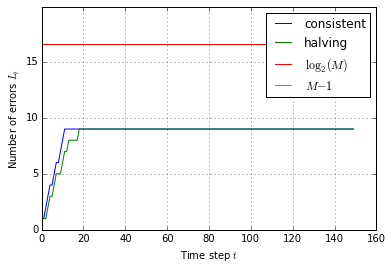

In [2]:
from pylab import *
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

x = floor(rand(T)*N)
f = sign(randn(M,N))
iO = floor(rand()*M)
y = f[iO,[x]][0]

consistent,halving = [],[]
V = arange(M)
for t in range(T):
    u = f[[V],x[t]][0]
    list.append(consistent,(1-u[0]*y[t])/2)
    list.append(halving,(1-sign(sum(u)+0.1)*y[t])/2)
    V = V[u==y[t]]

consistent = cumsum(consistent)
halving = cumsum(halving)

fig = plt.figure()
ax = fig.add_subplot(111)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(0,1.2*log(M)/log(2))
l1, = plt.plot(consistent)
l2, = plt.plot(halving)
l3, = plt.plot(repeat(log(M)/log(2),T))
l4, = plt.plot(repeat(M-1,T))
plt.legend([l1,l2,l3,l4],['consistent','halving','$\log_2(M)$','$M-1$'])
plt.grid(True,which="both")
plt.xlabel(r"Time step $t$")
plt.ylabel(r"Number of errors $L_t$")
plt.show()

**Classical sets of predictors**

When we have a set of functions $\mathcal{S}=\{f_1,\dots,f_M\}$, to compete against the best member of $\mathcal{S}$, that is, setting $\mathcal{F}=\mathcal{S}$ is often called MS-type aggregation (MS stands for Model Selection). To set $\mathcal{F}={\rm conv}(\mathcal{S}) = \left\{\sum_{i=1}^n \alpha_i f_i(\cdot),\alpha_i\geq 0, \sum_{i=1}^n \alpha_i =1\right\}$ leads to C-type aggregation (C stands for Convex). Finally, $\mathcal{F}={\rm span}(\mathcal{S}) = \left\{\sum_{i=1}^n \alpha_i f_i(\cdot),\alpha\in\mathbb{R}^M\right\}$ leads to L-type aggregation (L stands for Linear).

When $\mathcal{X}=\mathbb{R}^M$, we can think of $f_1(x)=x_1,\dots,f_M(x)=x_M$ for $x=(x_1,\dots,x_p)$. But anything else works too.

**References**

This chapter is based on Section 1 in

S. Shalev-Shwartz, Online Learning and Online Convex Optimization, _Foundations and Trends in Machine Learning_, 4(2), pp. 107-194 (2011).

In the batch setting, the analogous of the realizable case 1) would be to assume a parametric model. Then, theory is easier, but this assumption is most of the time simply wrong. But this is the only way that what was taught in universities in the 90s! On the other hand, in practice, people focused on effective classification and regression algorithms, and that worked! Leo Breiman attracted academics attention to this issue in his fascinating paper:

L. Breiman, Statistical Modelling: the two Cultures, _Statistical Science_, 16(3), pp. 199-231 (2001).

There is actually an analogous of 2) in the batch setting: statistical learning theory, that started in the early 70's, with the works of Vapnik and Chervonenkis. Aggregation theory is a part of statistical learning theory. It shows that good learning algorithms try to mimic the best predictor in an adequate family $\mathcal{F}$. In theory, that means that we are able to control $R(\hat{f})-\inf_{f\in\mathcal{F}}R(f)$. We will see some aspects of this theory in the next chapters. Note that the MS, C and L terminology is due to one of the founding works in aggregation theory in statistics:

A. Nemirovski, Topics in Non-parametric Statistics, in _Ecole d'Eté de Probabilités de Saint-Flour XXVIII_, Lecture Notes in Mathematics, Springer (1998).